## Exploratory Data Analysis of Materials GIC sector companies' ESG ratings

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,6)
import requests
import json
from pandas import json_normalize
from pprint import pprint

In [9]:
import os
os.getcwd()

'C:\\Users\\Jenkir\\Desktop\\cherry-tree-lane-analytics\\INDUSTRIES\\Materials-GICsector-EDA'

In [10]:
#os.chdir('C:\\Users\\Jenkir\\Desktop\\cherry-tree-lane-analytics\\INDUSTRIES')
#os.getcwd()

In [11]:
# Step 1: Import dataset using read_csv

# got error until I added    encoding="ISO-8859-1"
df = pd.read_csv("materials_sector_partial_dataset.csv", encoding="ISO-8859-1")
df.head()


,unique_id,company_name,gicSector,gicSubIndustry,gicIndustry,company_pulse
0,195610,AMG Advanced Metallurgical Group N.V,Materials,Diversified Metals & Mining,Metals & Mining,0.334243
1,195583,"Acerinox, S.A",Materials,Steel,Metals & Mining,0.180600
2,206683,AdvanSix Inc,Materials,Commodity Chemicals,Chemicals,0.597531
3,244892,Advanced Emissions Solutions Inc,Materials,Specialty Chemicals,Chemicals,0.631753
4,191126,Agnico Eagle Mines Limited,Materials,Gold,Metals & Mining,0.330268


### Understand the big picture of the data

In [14]:
convert = {"unique_id": str,
          }
df = df.astype(convert)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   unique_id       274 non-null    object 
 1   company_name    274 non-null    object 
 2   gicSector       274 non-null    object 
 3   gicSubIndustry  271 non-null    object 
 4   gicIndustry     274 non-null    object 
 5   company_pulse   274 non-null    float64
dtypes: float64(1), object(5)
memory usage: 13.0+ KB


In [18]:
# We'll change the names of three columns 
# Using inplace = True means that the original dataframe will be modified permanently; 
# be careful when using inplace=True; for more info., see  https://towardsdatascience.com/a-simple-guide-to-inplace-operations-in-pandas-7a1d97ecce24
df1 = df.rename(columns = {"gicSector": "GIC_Sector",
                    "gicSubIndustry": "GIC_SubIndustry",
                    "gicIndustry": "GIC_Industry"      
                          })
                   
df1.head()

,unique_id,company_name,GIC_Sector,GIC_SubIndustry,GIC_Industry,company_pulse
0,195610,AMG Advanced Metallurgical Group N.V,Materials,Diversified Metals & Mining,Metals & Mining,0.334243
1,195583,"Acerinox, S.A",Materials,Steel,Metals & Mining,0.180600
2,206683,AdvanSix Inc,Materials,Commodity Chemicals,Chemicals,0.597531
3,244892,Advanced Emissions Solutions Inc,Materials,Specialty Chemicals,Chemicals,0.631753
4,191126,Agnico Eagle Mines Limited,Materials,Gold,Metals & Mining,0.330268


In [170]:
df_sorted_temp = df1.sort_values(by=['GIC_SubIndustry', 'company_pulse'], ascending=[False, False])

df_sorted_temp

,unique_id,company_name,GIC_Sector,GIC_SubIndustry,GIC_Industry,company_pulse
273,245310,ZK International Group Co Ltd,Materials,Steel,Metals & Mining,0.768867
9,206491,Allegheny Technologies Incorporated,Materials,Steel,Metals & Mining,0.766029
58,204783,Commercial Metals Company,Materials,Steel,Metals & Mining,0.632205
204,195161,Ryerson Holding Corporation,Materials,Steel,Metals & Mining,0.630292
207,190939,"Schnitzer Steel Industries, Inc",Materials,Steel,Metals & Mining,0.604208
...,...,...,...,...,...,...
10,193596,Aluminum Corporation of China Limited,Materials,Aluminum,Metals & Mining,-0.126100
8,240388,Alcoa Corp,Materials,Aluminum,Metals & Mining,-0.167700
196,208725,Ranpak Holdings Corp,Materials,NaN,Containers & Packaging,0.595333
153,245701,Mayville Engineering Co Inc,Materials,NaN,Metals & Mining,0.000000


In [171]:
df_sorted_temp.rename(columns={'company_name': "Company Name",
                                                   'GIC_Sector': "GIC Sector",
                                                   "GIC_SubIndustry": "GIC SubIndustry",
                                                   "GIC_Industry": "GIC Industry",
                                                   "company_pulse": "ESG rating"},
                                                    inplace=True)
df_sorted_temp

,unique_id,Company Name,GIC Sector,GIC SubIndustry,GIC Industry,ESG rating
273,245310,ZK International Group Co Ltd,Materials,Steel,Metals & Mining,0.768867
9,206491,Allegheny Technologies Incorporated,Materials,Steel,Metals & Mining,0.766029
58,204783,Commercial Metals Company,Materials,Steel,Metals & Mining,0.632205
204,195161,Ryerson Holding Corporation,Materials,Steel,Metals & Mining,0.630292
207,190939,"Schnitzer Steel Industries, Inc",Materials,Steel,Metals & Mining,0.604208
...,...,...,...,...,...,...
10,193596,Aluminum Corporation of China Limited,Materials,Aluminum,Metals & Mining,-0.126100
8,240388,Alcoa Corp,Materials,Aluminum,Metals & Mining,-0.167700
196,208725,Ranpak Holdings Corp,Materials,NaN,Containers & Packaging,0.595333
153,245701,Mayville Engineering Co Inc,Materials,NaN,Metals & Mining,0.000000


In [172]:
df_sorted_pulse = df_sorted_temp.drop(columns=['unique_id'])
df_sorted_pulse

,Company Name,GIC Sector,GIC SubIndustry,GIC Industry,ESG rating
273,ZK International Group Co Ltd,Materials,Steel,Metals & Mining,0.768867
9,Allegheny Technologies Incorporated,Materials,Steel,Metals & Mining,0.766029
58,Commercial Metals Company,Materials,Steel,Metals & Mining,0.632205
204,Ryerson Holding Corporation,Materials,Steel,Metals & Mining,0.630292
207,"Schnitzer Steel Industries, Inc",Materials,Steel,Metals & Mining,0.604208
...,...,...,...,...,...
10,Aluminum Corporation of China Limited,Materials,Aluminum,Metals & Mining,-0.126100
8,Alcoa Corp,Materials,Aluminum,Metals & Mining,-0.167700
196,Ranpak Holdings Corp,Materials,NaN,Containers & Packaging,0.595333
153,Mayville Engineering Co Inc,Materials,NaN,Metals & Mining,0.000000


In [165]:
# https://pypi.org/project/dataframe-image/#:~:text=Pass%20your%20normal%20or%20styled,save%20it%20as%20an%20image.&text=You%20may%20also%20export%20directly,export%20and%20export_png%20methods%2C%20respectively.
#pip install dataframe_image

     ---------------------------------------- 6.7/6.7 MB 8.9 MB/s eta 0:00:00
     -------------------------------------- 366.0/366.0 kB 7.7 MB/s eta 0:00:00
     ---------------------------------------- 3.9/3.9 MB 10.9 MB/s eta 0:00:00
     -------------------------------------- 398.5/398.5 kB 6.3 MB/s eta 0:00:00
     ---------------------------------------- 50.7/50.7 kB ? eta 0:00:00
     ---------------------------------------- 76.9/76.9 kB ? eta 0:00:00
     ---------------------------------------- 85.4/85.4 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: traitlets
    Found existing installation: traitlets 5.0.5
    Uninstalling traitlets-5.0.5:
      Successfully uninstalled traitlets-5.0.5



  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyterlab 4.0.11 requires tornado>=6.2.0, but you have tornado 6.1 which is incompatible.
jupyter-server 2.12.5 requires jupyter-client>=7.4.4, but you have jupyter-client 6.1.12 which is incompatible.
jupyter-server 2.12.5 requires jupyter-core!=5.0.*,>=4.12, but you have jupyter-core 4.7.1 which is incompatible.
jupyter-server 2.12.5 requires pyzmq>=24, but you have pyzmq 22.1.0 which is incompatible.
jupyter-server 2.12.5 requires tornado>=6.2.0, but you have tornado 6

In [166]:
import dataframe_image as dfi

In [168]:
# see pandas style guide: 
# use style.set_properties when the style doesn't depend on the values

# BEST TO ONLY SAVE SMALLER STYLED DATAFRAMES (less than rows) as PNGs

# Style dataframe and export as image file
#df_sorted_pulse.style.set_properties(**{'background-color':'midnightblue',
#                                       'color': 'lawngreen',
#                                       'border-color': 'white'})
#df_sorted_pulse.dfi.export('df_materials_styled.png')

ValueError: Your DataFrame has more than 100 rows and will produce a huge image file, possibly causing your computer to crash. Override this error by explicitly setting `max_rows`. Use -1 for all rows.

In [159]:
df_sorted_pulse.to_csv('ESG-ratings-by-SubIndustry_Materials.csv', index=False, header=True)

### Univariate analysis/ understand the variables

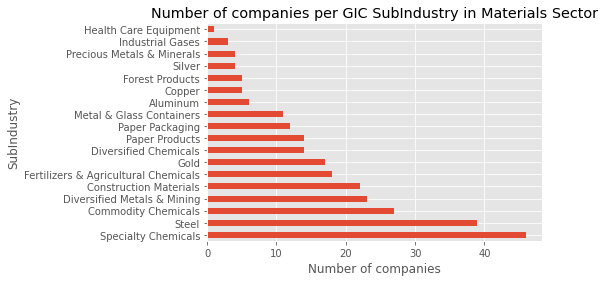

In [24]:
# Plot a simple horizontal bar chart of categorical data using matplotlib (be sure you have imported the matplotlib library as plt)
df1.GIC_SubIndustry.value_counts().plot(kind="barh")
plt.title("Number of companies per GIC SubIndustry in Materials Sector")
plt.xlabel("Number of companies")
plt.ylabel("SubIndustry")
plt.show()

# I got error message: AttributeError: module 'matplotlib' has no attribute 'title' 
# until I changed   import matplotlib as plt to import matplotlib.pyplot as plt

In [26]:
grouped = df1.groupby(['GIC_SubIndustry'])['company_pulse'].mean()
grouped
# "grouped" is now a Pandas series

GIC_SubIndustry
Aluminum                                0.151480
Commodity Chemicals                     0.275813
Construction Materials                 -0.004145
Copper                                  0.107736
Diversified Chemicals                   0.305980
Diversified Metals & Mining             0.085827
Fertilizers & Agricultural Chemicals    0.319100
Forest Products                         0.176793
Gold                                    0.284094
Health Care Equipment                   0.000000
Industrial Gases                        0.422862
Metal & Glass Containers                0.322298
Paper Packaging                         0.248107
Paper Products                          0.192345
Precious Metals & Minerals              0.048163
Silver                                  0.097358
Specialty Chemicals                     0.261083
Steel                                   0.166514
Name: company_pulse, dtype: float64

In [27]:
# Convert the pandas series "grouped" to a dataframe
grouped_df = grouped.to_frame().reset_index()
grouped_df

,GIC_SubIndustry,company_pulse
0,Aluminum,0.151480
1,Commodity Chemicals,0.275813
2,Construction Materials,-0.004145
3,Copper,0.107736
4,Diversified Chemicals,0.305980
5,Diversified Metals & Mining,0.085827
6,Fertilizers & Agricultural Chemicals,0.319100
7,Forest Products,0.176793
8,Gold,0.284094
9,Health Care Equipment,0.000000


In [35]:
# Plotly plots values in order they appear in the dataframe so helps to sort values before plotting if you want them in ascending or descending order
grouped_df_sorted = grouped_df.sort_values(by=['company_pulse'], ascending=False)
grouped_df_sorted

,GIC_SubIndustry,company_pulse
10,Industrial Gases,0.422862
11,Metal & Glass Containers,0.322298
6,Fertilizers & Agricultural Chemicals,0.319100
4,Diversified Chemicals,0.305980
8,Gold,0.284094
1,Commodity Chemicals,0.275813
16,Specialty Chemicals,0.261083
12,Paper Packaging,0.248107
13,Paper Products,0.192345
7,Forest Products,0.176793


In [38]:
# Plot using Plotly library
fig = px.bar(grouped_df_sorted,
             x ="GIC_SubIndustry", 
             y="company_pulse", 
             title ="Average ESG scores of companies in the SubIndustries of Materials sector",
             text_auto= True,
             labels={"GIC_SubIndustry": "GIC SubIndustries of Materials Sector",
                     "company_pulse": "ESG rating (AI-generated)"
                    }
             )

fig.update_traces(marker_color='orange', marker_line_color='blue',
                 marker_line_width=1, opacity=1)
fig.show()

In [ ]:
# List of Plotly colors: https://community.plotly.com/t/plotly-colours-list/11730/3

### GREENS

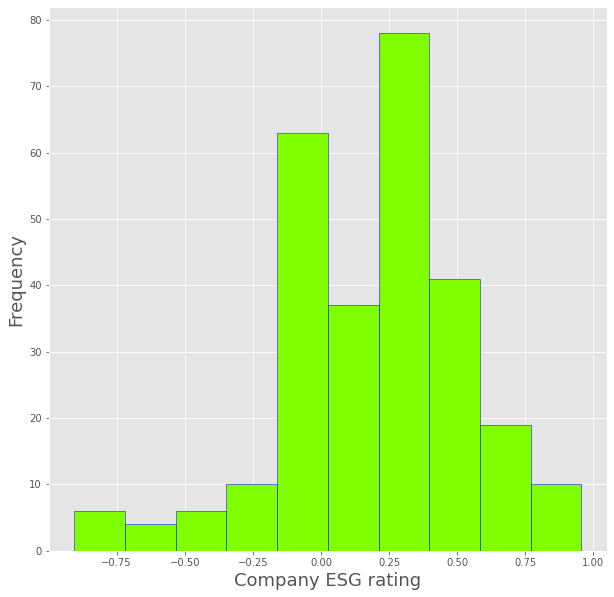

In [99]:
data = df1.company_pulse  # save the company_pulse data in variable called "data"
plt.hist(data, bins = 10, color='chartreuse', edgecolor='blue')
plt.rcParams['figure.figsize'] = [10,10]
#plt.figure(figsize=(5,5))
plt.ylabel('Frequency', fontsize=18)
plt.xlabel("Company ESG rating", fontsize=18)
plt.show()

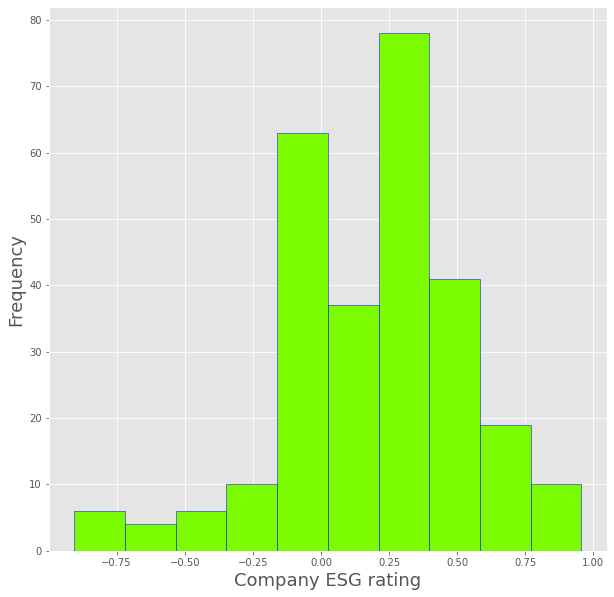

In [72]:
data = df1.company_pulse  # save the company_pulse data in variable called "data"
plt.hist(data, bins = 10, color='lawngreen', edgecolor='blue')
plt.rcParams['figure.figsize'] = [10,10]
#plt.figure(figsize=(5,5))
plt.ylabel('Frequency', fontsize=18)
plt.xlabel("Company ESG rating", fontsize=18)
plt.show()

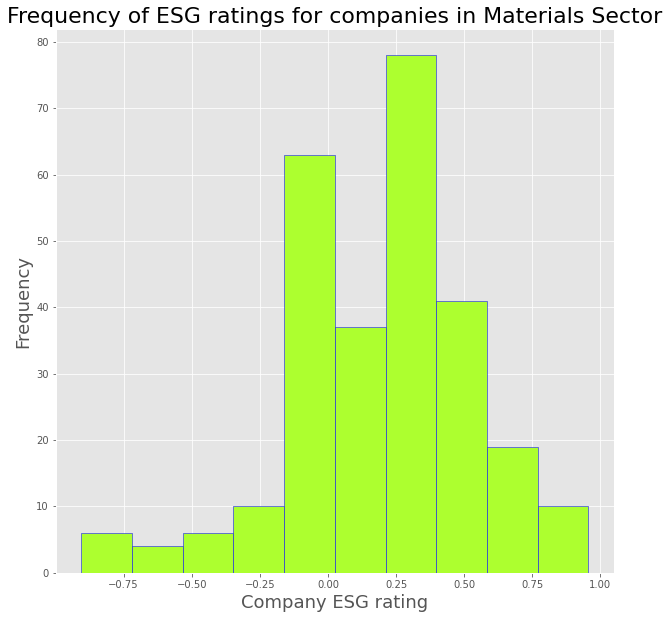

In [69]:
data = df1.company_pulse  # save the company_pulse data in variable called "data"
plt.hist(data, bins = 10, color='greenyellow', edgecolor='blue')
plt.rcParams['figure.figsize'] = [10,10]
#plt.figure(figsize=(5,5))
plt.ylabel('Frequency', fontsize=18)
plt.xlabel("Company ESG rating", fontsize=18)
plt.show()

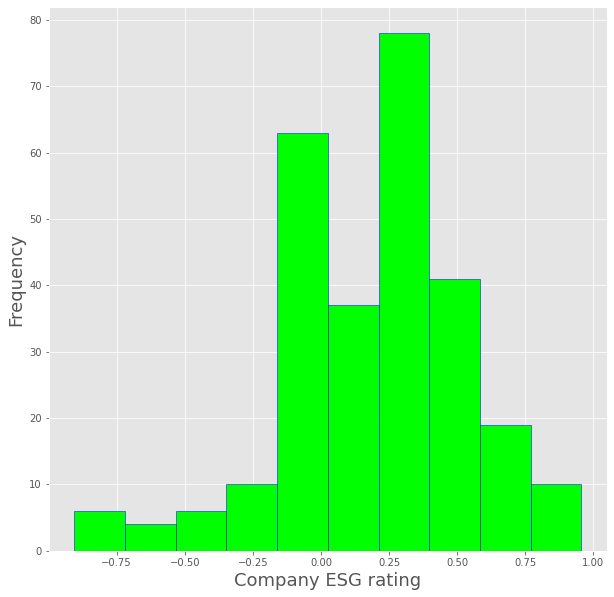

In [76]:
data = df1.company_pulse  # save the company_pulse data in variable called "data"
plt.hist(data, bins = 10, color='lime', edgecolor='blue')
plt.rcParams['figure.figsize'] = [10,10]
#plt.figure(figsize=(5,5))
plt.ylabel('Frequency', fontsize=18)
plt.xlabel("Company ESG rating", fontsize=18)
plt.show()

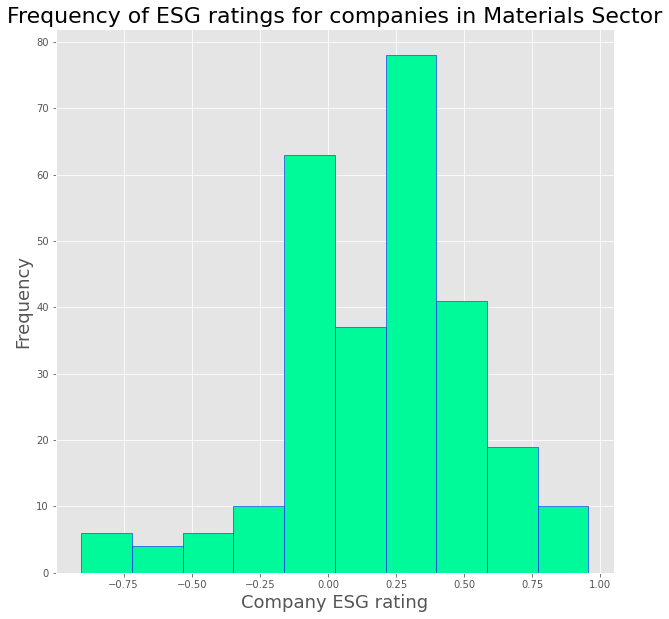

In [68]:
data = df1.company_pulse  # save the company_pulse data in variable called "data"
plt.hist(data, bins = 10, color='mediumspringgreen', edgecolor='blue')
plt.rcParams['figure.figsize'] = [10,10]
#plt.figure(figsize=(5,5))
plt.ylabel('Frequency', fontsize=18)
plt.xlabel("Company ESG rating", fontsize=18)
plt.show()

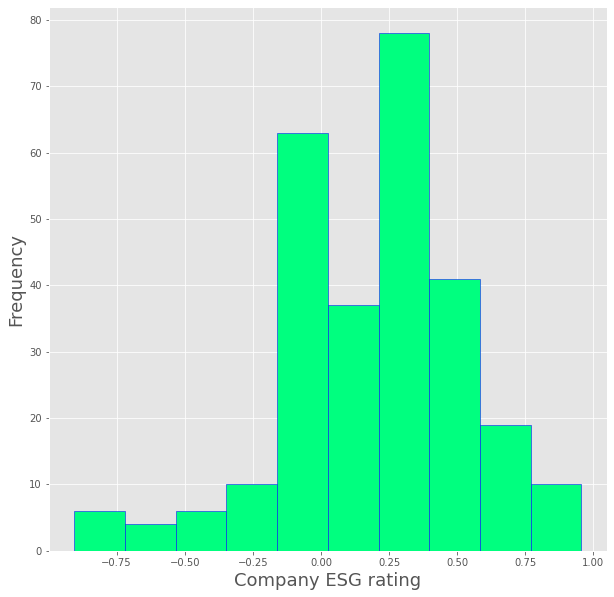

In [74]:
data = df1.company_pulse  # save the company_pulse data in variable called "data"
plt.hist(data, bins = 10, color='springgreen', edgecolor='blue')
plt.rcParams['figure.figsize'] = [10,10]
#plt.figure(figsize=(5,5))
plt.ylabel('Frequency', fontsize=18)
plt.xlabel("Company ESG rating", fontsize=18)
plt.show()

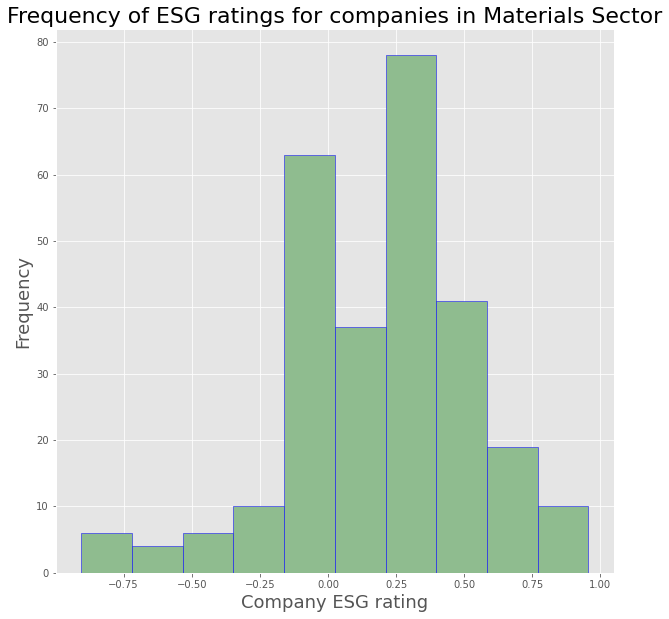

In [67]:
data = df1.company_pulse  # save the company_pulse data in variable called "data"
plt.hist(data, bins = 10, color='darkseagreen', edgecolor='blue')
plt.rcParams['figure.figsize'] = [10,10]
#plt.figure(figsize=(5,5))
plt.ylabel('Frequency', fontsize=18)
plt.xlabel("Company ESG rating", fontsize=18)
plt.savefig('frequency-ESG-ratings.png',bbox_inches='tight')
plt.show()

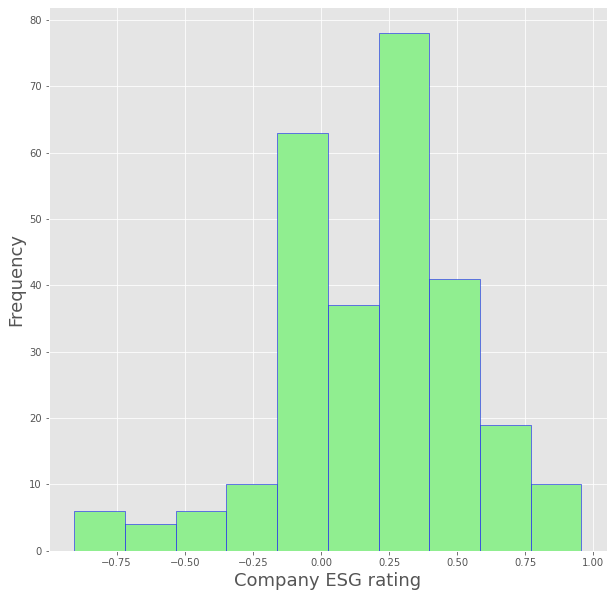

In [73]:
data = df1.company_pulse  # save the company_pulse data in variable called "data"
plt.hist(data, bins = 10, color='lightgreen', edgecolor='blue')
plt.rcParams['figure.figsize'] = [10,10]
#plt.figure(figsize=(5,5))
plt.ylabel('Frequency', fontsize=18)
plt.xlabel("Company ESG rating", fontsize=18)
plt.show()

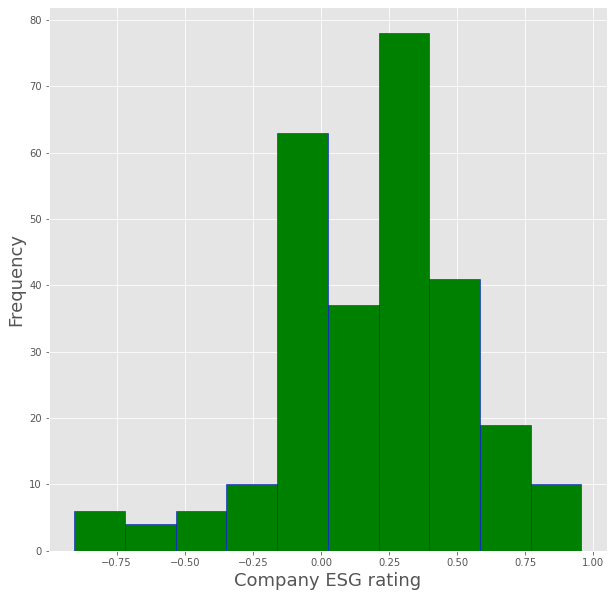

In [75]:
data = df1.company_pulse  # save the company_pulse data in variable called "data"
plt.hist(data, bins = 10, color='green', edgecolor='blue')

plt.rcParams['figure.figsize'] = [10,10]
#plt.figure(figsize=(5,5))
plt.ylabel('Frequency', fontsize=18)
plt.xlabel("Company ESG rating", fontsize=18)
# Note that plt.show( should be placed AFTER plt.savefig() otherwise plt.savefig() will just save a blank figure)
plt.savefig('frequency-ESG-ratings.png',bbox_inches='tight')
plt.show()

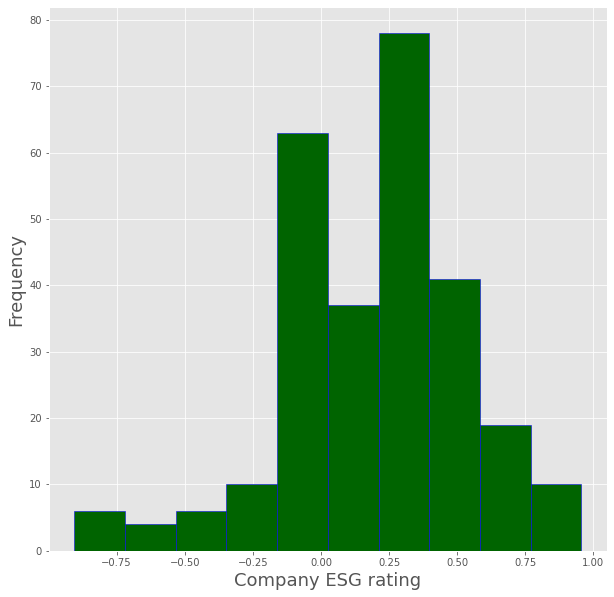

In [106]:
data = df1.company_pulse  # save the company_pulse data in variable called "data"
plt.hist(data, bins = 10, color='darkgreen', edgecolor='blue')
plt.rcParams['figure.figsize'] = [10,10]
plt.ylabel('Frequency', fontsize=18)
plt.xlabel("Company ESG rating", fontsize=18)
plt.show()

### ORANGES

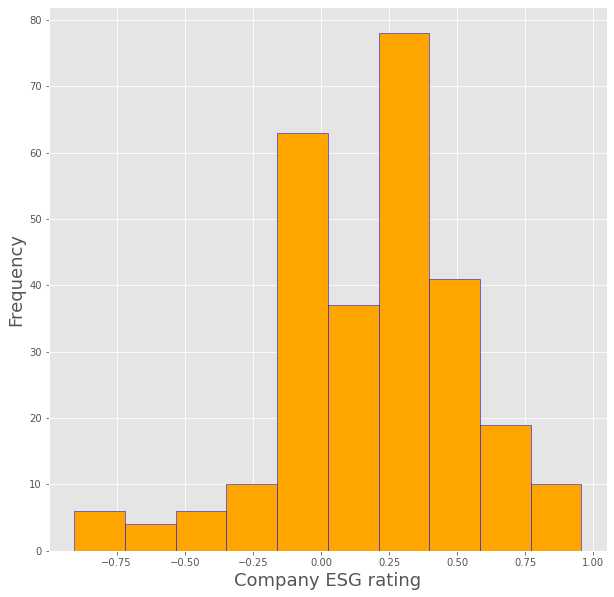

In [78]:
data = df1.company_pulse  # save the company_pulse data in variable called "data"
plt.hist(data, bins = 10, color='orange', edgecolor='blue')
plt.rcParams['figure.figsize'] = [10,10]
#plt.figure(figsize=(5,5))
plt.ylabel('Frequency', fontsize=18)
plt.xlabel("Company ESG rating", fontsize=18)
plt.show()

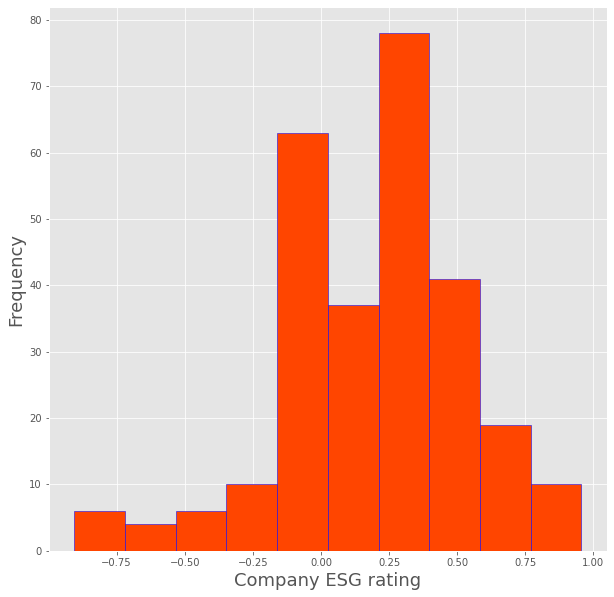

In [79]:
data = df1.company_pulse  # save the company_pulse data in variable called "data"
plt.hist(data, bins = 10, color='orangered', edgecolor='blue')
plt.rcParams['figure.figsize'] = [10,10]
#plt.figure(figsize=(5,5))
plt.ylabel('Frequency', fontsize=18)
plt.xlabel("Company ESG rating", fontsize=18)
plt.show()

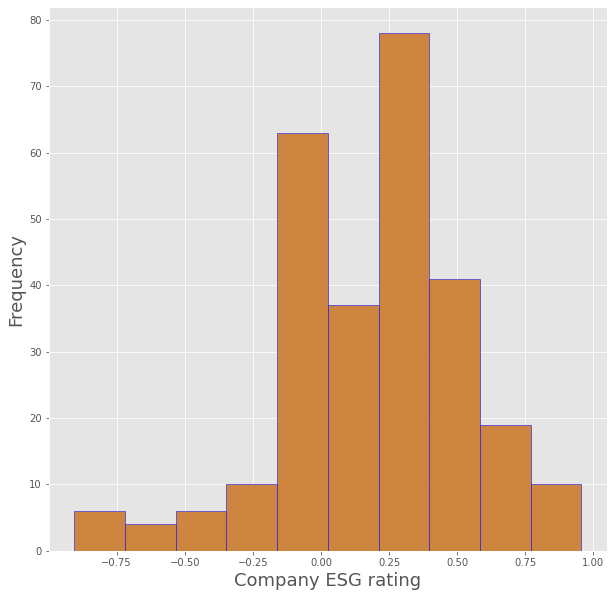

In [80]:
data = df1.company_pulse  # save the company_pulse data in variable called "data"
plt.hist(data, bins = 10, color='peru', edgecolor='blue')
plt.rcParams['figure.figsize'] = [10,10]
#plt.figure(figsize=(5,5))
plt.ylabel('Frequency', fontsize=18)
plt.xlabel("Company ESG rating", fontsize=18)
plt.show()

### PINKS

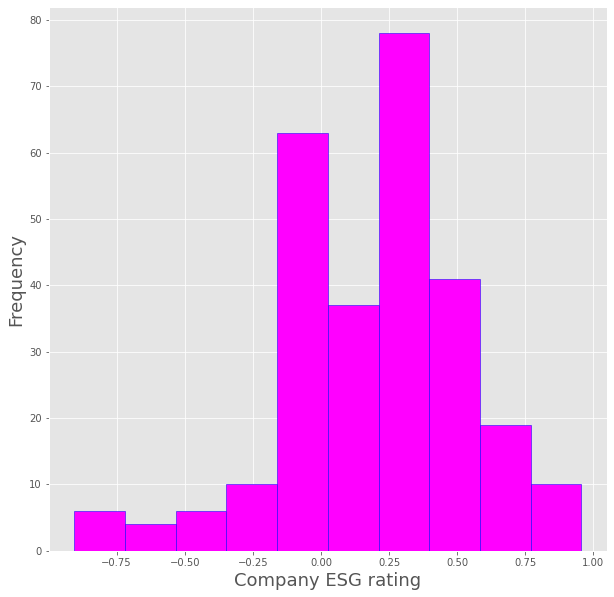

In [85]:
data = df1.company_pulse  # save the company_pulse data in variable called "data"
plt.hist(data, bins = 10, color='fuchsia', edgecolor='blue')
plt.rcParams['figure.figsize'] = [10,10]
#plt.figure(figsize=(5,5))
plt.ylabel('Frequency', fontsize=18)
plt.xlabel("Company ESG rating", fontsize=18)
plt.show()

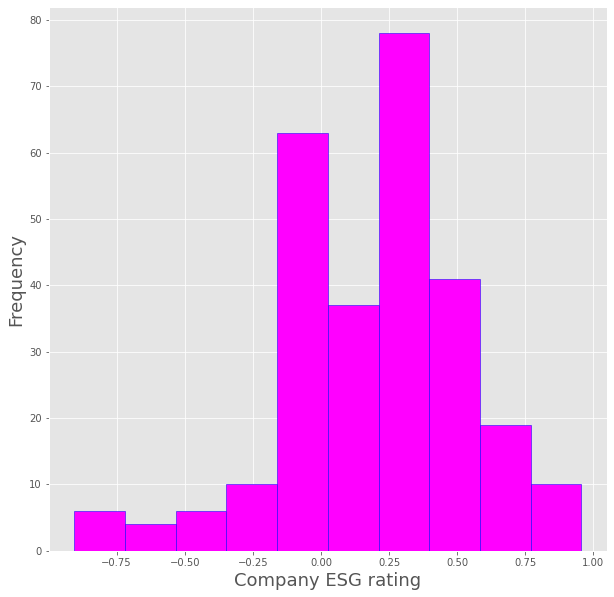

In [88]:
data = df1.company_pulse  # save the company_pulse data in variable called "data"
plt.hist(data, bins = 10, color='magenta', edgecolor='blue')
plt.rcParams['figure.figsize'] = [10,10]
#plt.figure(figsize=(5,5))
plt.ylabel('Frequency', fontsize=18)
plt.xlabel("Company ESG rating", fontsize=18)
plt.show()

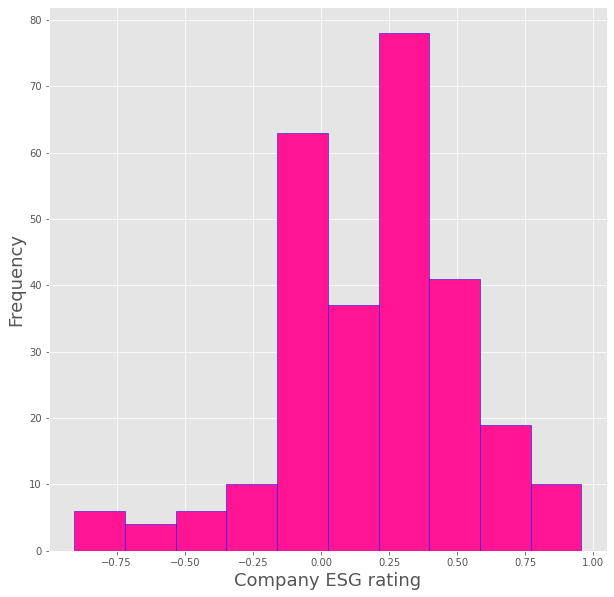

In [117]:
data = df1.company_pulse  # save the company_pulse data in variable called "data"
plt.hist(data, bins = 10, color='deeppink', edgecolor='blue')
plt.rcParams['figure.figsize'] = [10,10]
plt.ylabel('Frequency', fontsize=18)
plt.xlabel("Company ESG rating", fontsize=18)
plt.show()

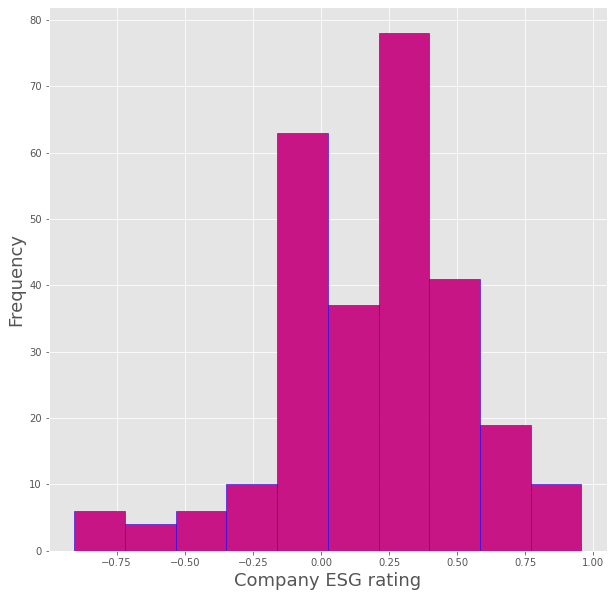

In [91]:
data = df1.company_pulse  # save the company_pulse data in variable called "data"
plt.hist(data, bins = 10, color='mediumvioletred', edgecolor='blue')
plt.rcParams['figure.figsize'] = [10,10]
#plt.figure(figsize=(5,5))
plt.ylabel('Frequency', fontsize=18)
plt.xlabel("Company ESG rating", fontsize=18)
plt.show()

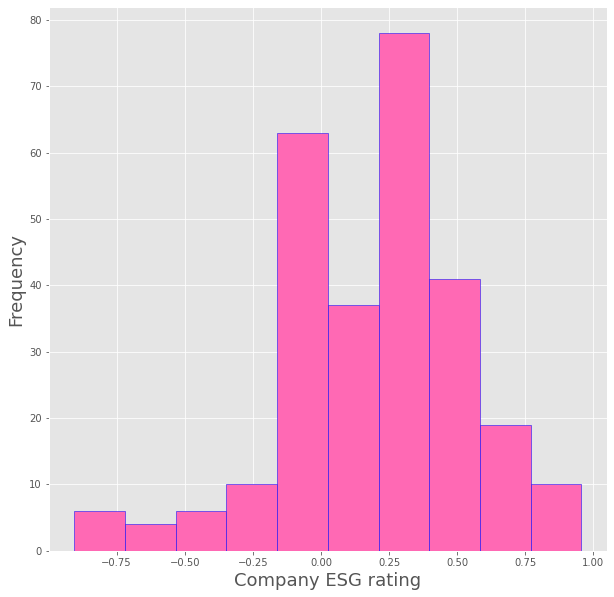

In [86]:
data = df1.company_pulse  # save the company_pulse data in variable called "data"
plt.hist(data, bins = 10, color='hotpink', edgecolor='blue')
plt.rcParams['figure.figsize'] = [10,10]
#plt.figure(figsize=(5,5))
plt.ylabel('Frequency', fontsize=18)
plt.xlabel("Company ESG rating", fontsize=18)
plt.show()

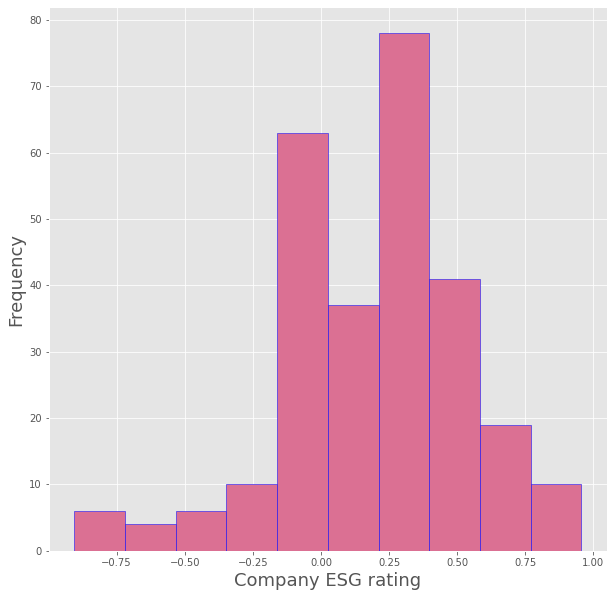

In [92]:
data = df1.company_pulse  # save the company_pulse data in variable called "data"
plt.hist(data, bins = 10, color='palevioletred', edgecolor='blue')
plt.rcParams['figure.figsize'] = [10,10]
#plt.figure(figsize=(5,5))
plt.ylabel('Frequency', fontsize=18)
plt.xlabel("Company ESG rating", fontsize=18)
plt.show()

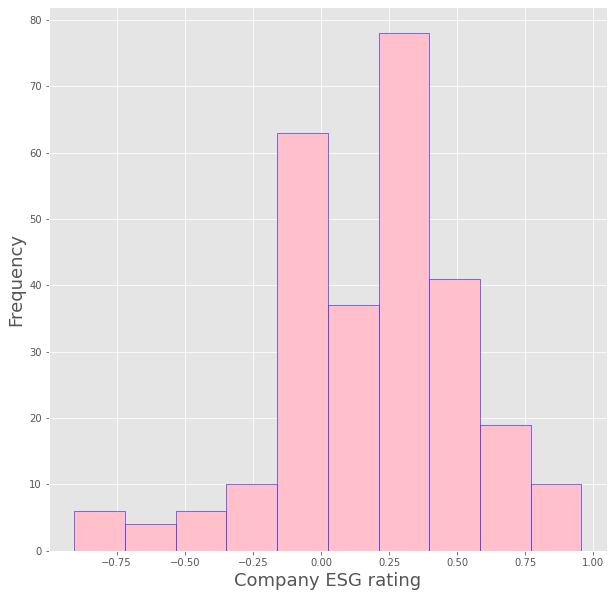

In [90]:
data = df1.company_pulse  # save the company_pulse data in variable called "data"
plt.hist(data, bins = 10, color='pink', edgecolor='blue')
plt.rcParams['figure.figsize'] = [10,10]
#plt.figure(figsize=(5,5))
plt.ylabel('Frequency', fontsize=18)
plt.xlabel("Company ESG rating", fontsize=18)
plt.show()

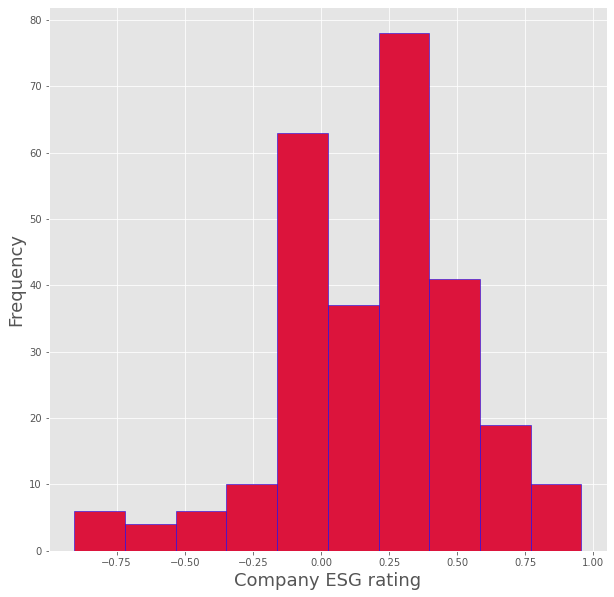

In [101]:
data = df1.company_pulse  # save the company_pulse data in variable called "data"
plt.hist(data, bins = 10, color='crimson', edgecolor='blue')
plt.rcParams['figure.figsize'] = [10,10]
plt.ylabel('Frequency', fontsize=18)
plt.xlabel("Company ESG rating", fontsize=18)
plt.show()

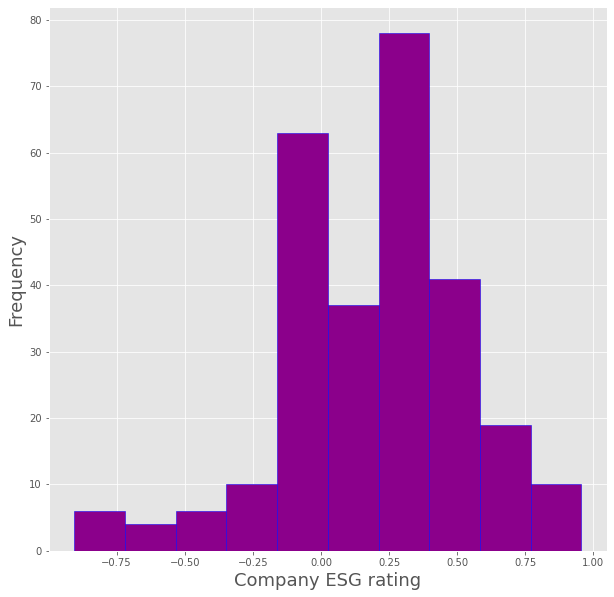

In [84]:
data = df1.company_pulse  # save the company_pulse data in variable called "data"
plt.hist(data, bins = 10, color='darkmagenta', edgecolor='blue')
plt.rcParams['figure.figsize'] = [10,10]
#plt.figure(figsize=(5,5))
plt.ylabel('Frequency', fontsize=18)
plt.xlabel("Company ESG rating", fontsize=18)
plt.show()

### BLUES

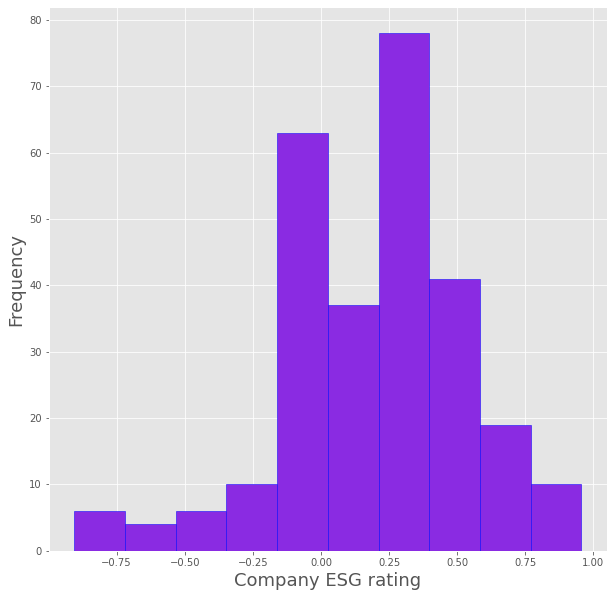

In [96]:
data = df1.company_pulse  # save the company_pulse data in variable called "data"
plt.hist(data, bins = 10, color='blueviolet', edgecolor='blue')
plt.rcParams['figure.figsize'] = [10,10]
#plt.figure(figsize=(5,5))
plt.ylabel('Frequency', fontsize=18)
plt.xlabel("Company ESG rating", fontsize=18)
plt.show()

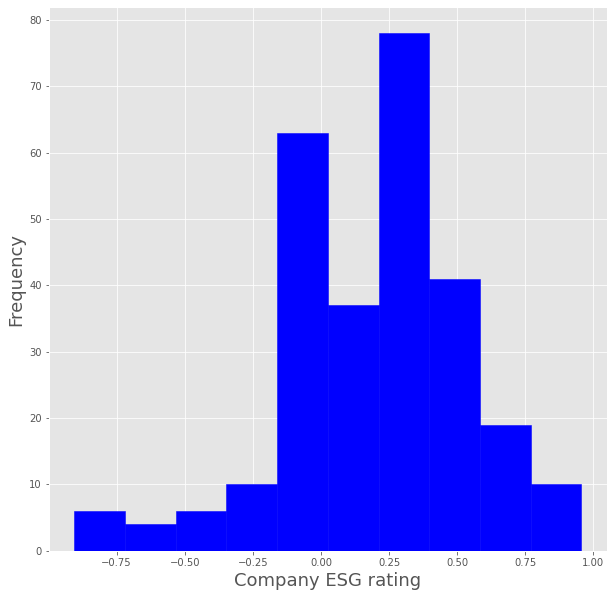

In [95]:
data = df1.company_pulse  # save the company_pulse data in variable called "data"
plt.hist(data, bins = 10, color='blue', edgecolor='blue')
plt.rcParams['figure.figsize'] = [10,10]
#plt.figure(figsize=(5,5))
plt.ylabel('Frequency', fontsize=18)
plt.xlabel("Company ESG rating", fontsize=18)
plt.show()

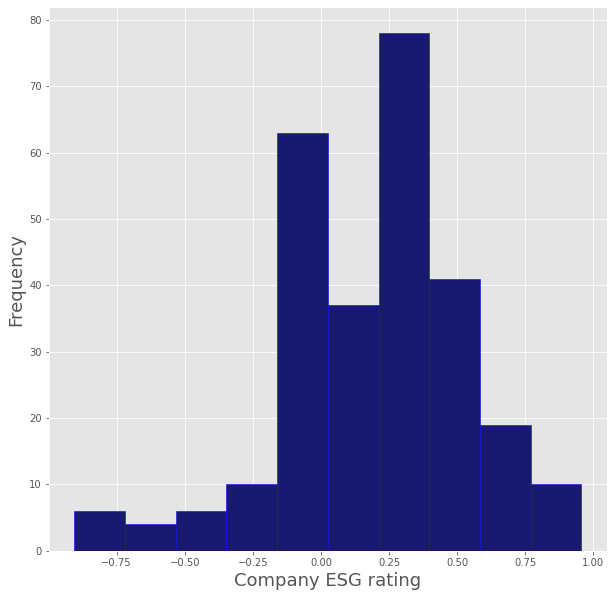

In [110]:
data = df1.company_pulse  # save the company_pulse data in variable called "data"
plt.hist(data, bins = 10, color='midnightblue', edgecolor='blue')
plt.rcParams['figure.figsize'] = [10,10]
plt.ylabel('Frequency', fontsize=18)
plt.xlabel("Company ESG rating", fontsize=18)
plt.show()

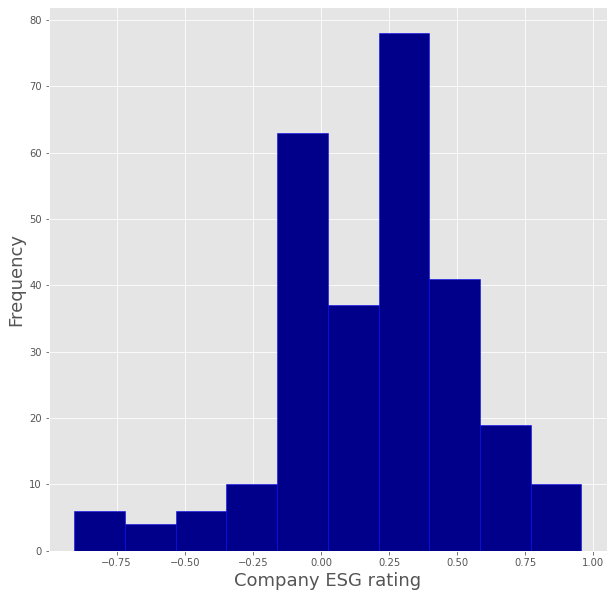

In [133]:
data = df1.company_pulse  # save the company_pulse data in variable called "data"
plt.hist(data, bins = 10, color='darkblue', edgecolor='blue')
plt.rcParams['figure.figsize'] = [10,10]
#plt.figure(figsize=(5,5))
plt.ylabel('Frequency', fontsize=18)
plt.xlabel("Company ESG rating", fontsize=18)
plt.show()

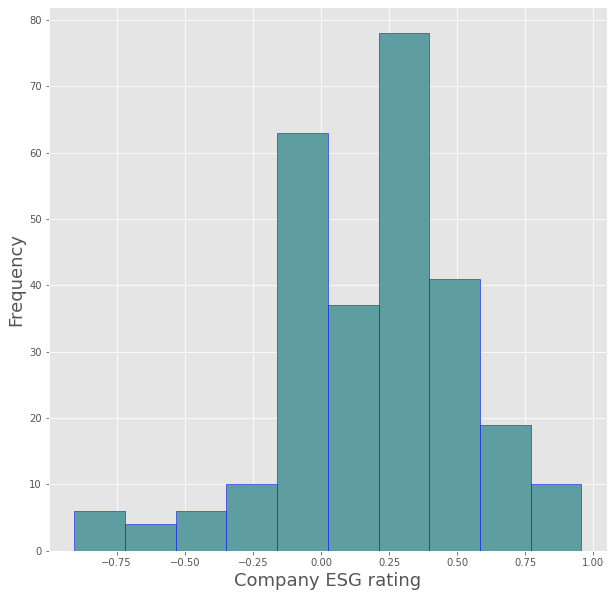

In [97]:
data = df1.company_pulse  # save the company_pulse data in variable called "data"
plt.hist(data, bins = 10, color='cadetblue', edgecolor='blue')
plt.rcParams['figure.figsize'] = [10,10]
#plt.figure(figsize=(5,5))
plt.ylabel('Frequency', fontsize=18)
plt.xlabel("Company ESG rating", fontsize=18)
plt.show()

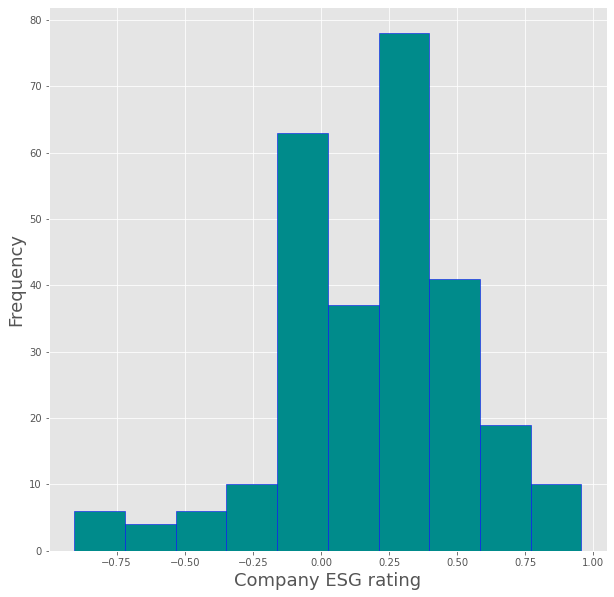

In [135]:
data = df1.company_pulse  # save the company_pulse data in variable called "data"
plt.hist(data, bins = 10, color='darkcyan', edgecolor='blue')
plt.rcParams['figure.figsize'] = [10,10]
#plt.figure(figsize=(5,5))
plt.ylabel('Frequency', fontsize=18)
plt.xlabel("Company ESG rating", fontsize=18)
plt.show()

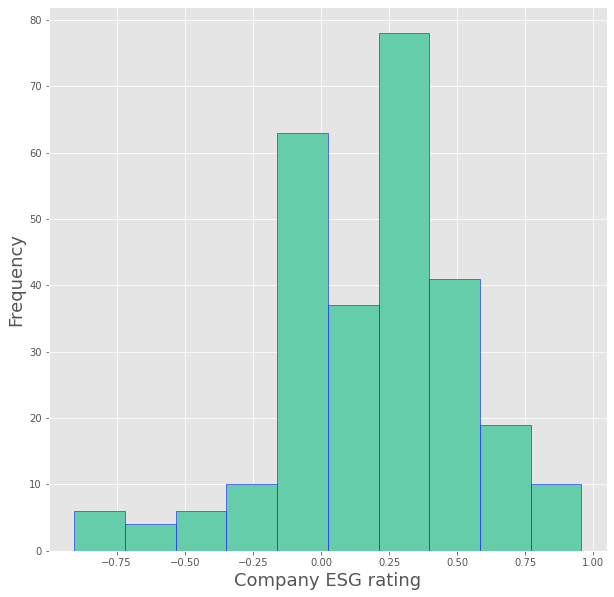

In [109]:
data = df1.company_pulse  # save the company_pulse data in variable called "data"
plt.hist(data, bins = 10, color='mediumaquamarine', edgecolor='blue')
plt.rcParams['figure.figsize'] = [10,10]
plt.ylabel('Frequency', fontsize=18)
plt.xlabel("Company ESG rating", fontsize=18)
plt.show()

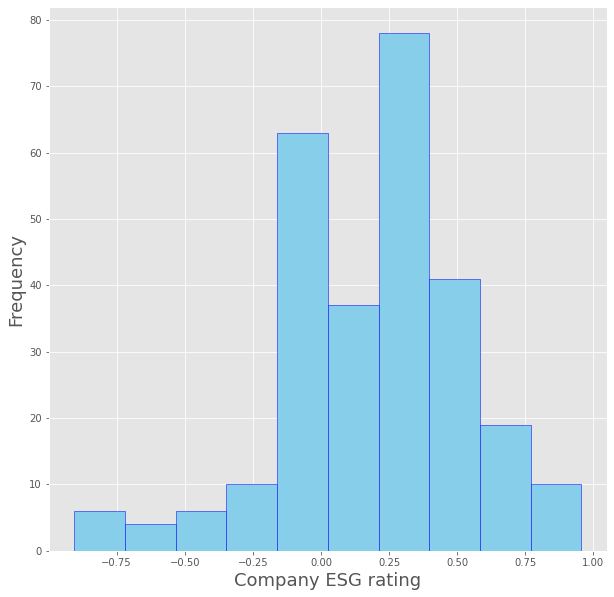

In [112]:
data = df1.company_pulse  # save the company_pulse data in variable called "data"
plt.hist(data, bins = 10, color='skyblue', edgecolor='blue')
plt.rcParams['figure.figsize'] = [10,10]
plt.ylabel('Frequency', fontsize=18)
plt.xlabel("Company ESG rating", fontsize=18)
plt.show()

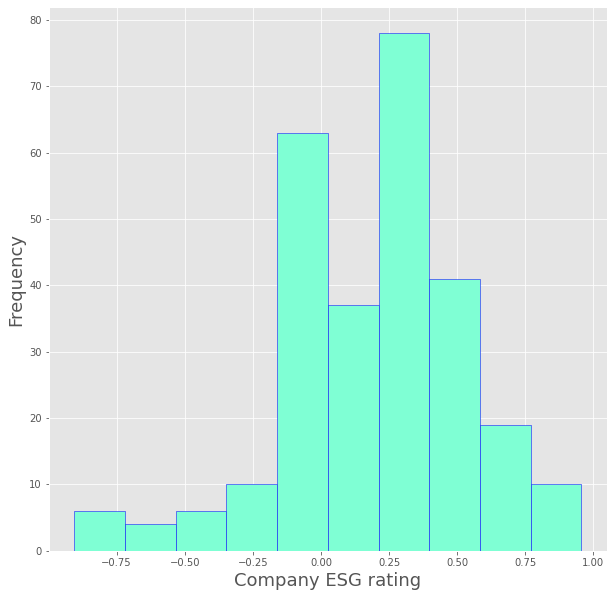

In [93]:
data = df1.company_pulse  # save the company_pulse data in variable called "data"
plt.hist(data, bins = 10, color='aquamarine', edgecolor='blue')
plt.rcParams['figure.figsize'] = [10,10]
#plt.figure(figsize=(5,5))
plt.ylabel('Frequency', fontsize=18)
plt.xlabel("Company ESG rating", fontsize=18)
plt.show()

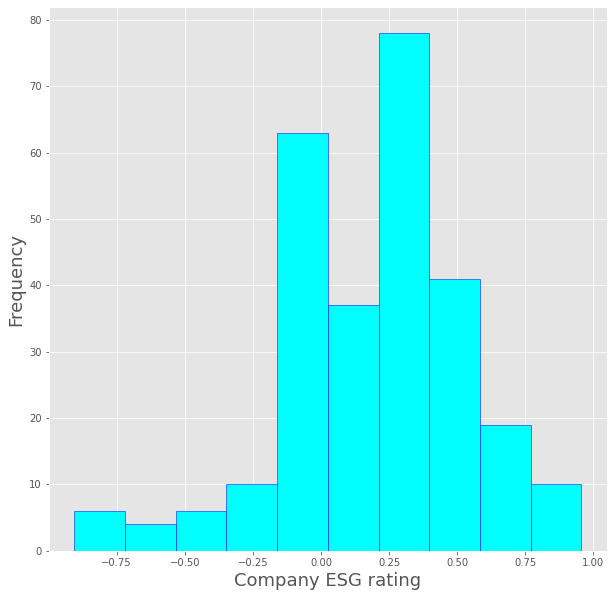

In [102]:
data = df1.company_pulse  # save the company_pulse data in variable called "data"
plt.hist(data, bins = 10, color='cyan', edgecolor='blue')
plt.rcParams['figure.figsize'] = [10,10]
plt.ylabel('Frequency', fontsize=18)
plt.xlabel("Company ESG rating", fontsize=18)
plt.show()

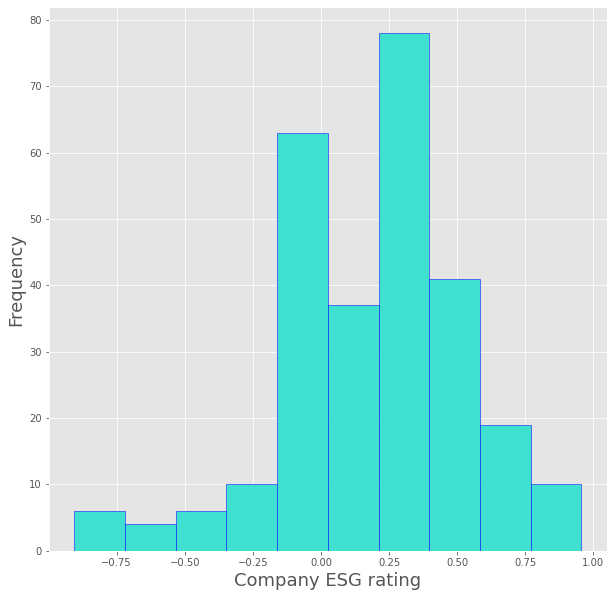

In [113]:
data = df1.company_pulse  # save the company_pulse data in variable called "data"
plt.hist(data, bins = 10, color='turquoise', edgecolor='blue')
plt.rcParams['figure.figsize'] = [10,10]
plt.ylabel('Frequency', fontsize=18)
plt.xlabel("Company ESG rating", fontsize=18)
plt.show()

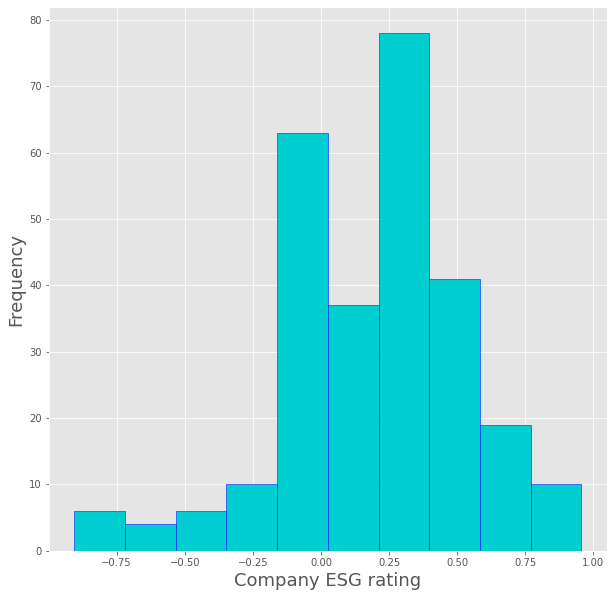

In [107]:
data = df1.company_pulse  # save the company_pulse data in variable called "data"
plt.hist(data, bins = 10, color='darkturquoise', edgecolor='blue')
plt.rcParams['figure.figsize'] = [10,10]
plt.ylabel('Frequency', fontsize=18)
plt.xlabel("Company ESG rating", fontsize=18)
plt.show()

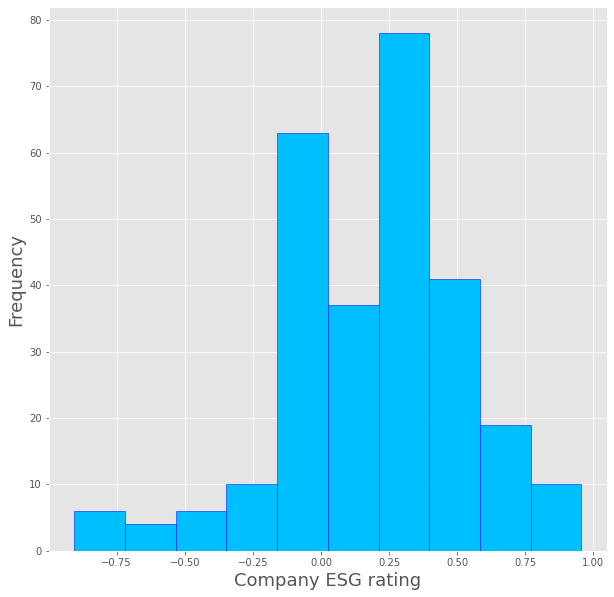

In [108]:
data = df1.company_pulse  # save the company_pulse data in variable called "data"
plt.hist(data, bins = 10, color='deepskyblue', edgecolor='blue')
plt.rcParams['figure.figsize'] = [10,10]
plt.ylabel('Frequency', fontsize=18)
plt.xlabel("Company ESG rating", fontsize=18)
plt.show()

### GRAYS

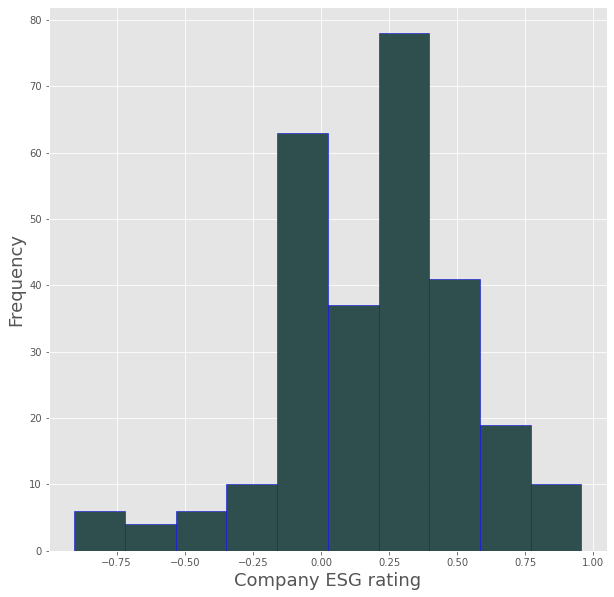

In [115]:
data = df1.company_pulse  # save the company_pulse data in variable called "data"
plt.hist(data, bins = 10, color='darkslategray', edgecolor='blue')
plt.rcParams['figure.figsize'] = [10,10]
plt.ylabel('Frequency', fontsize=18)
plt.xlabel("Company ESG rating", fontsize=18)
plt.show()

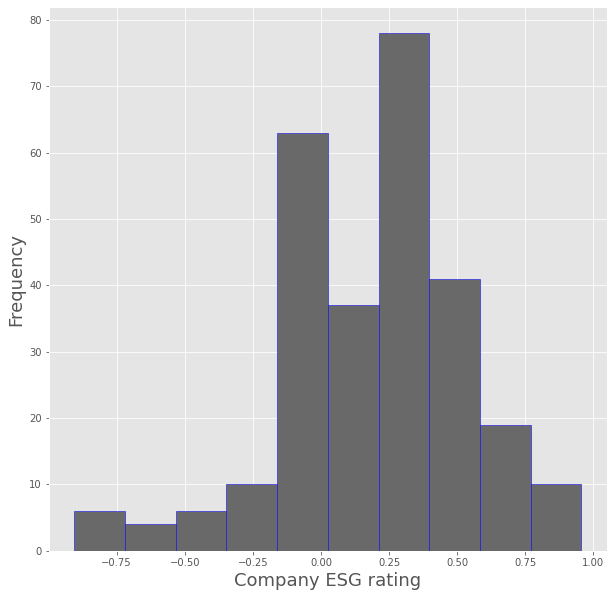

In [118]:
data = df1.company_pulse  # save the company_pulse data in variable called "data"
plt.hist(data, bins = 10, color='dimgray', edgecolor='blue')
plt.rcParams['figure.figsize'] = [10,10]
plt.ylabel('Frequency', fontsize=18)
plt.xlabel("Company ESG rating", fontsize=18)
plt.show()

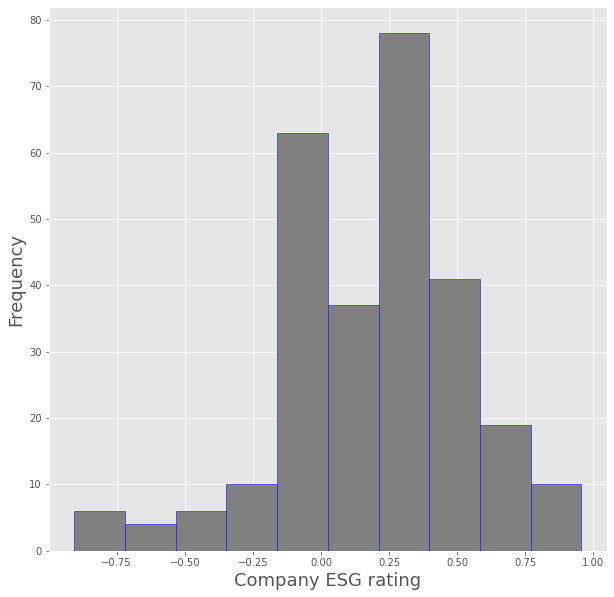

In [119]:
data = df1.company_pulse  # save the company_pulse data in variable called "data"
plt.hist(data, bins = 10, color='gray', edgecolor='blue')
plt.rcParams['figure.figsize'] = [10,10]
plt.ylabel('Frequency', fontsize=18)
plt.xlabel("Company ESG rating", fontsize=18)
plt.show()

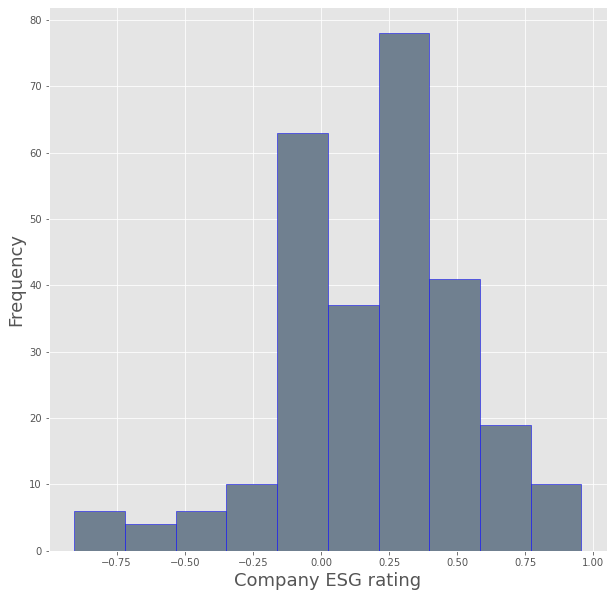

In [121]:
data = df1.company_pulse  # save the company_pulse data in variable called "data"
plt.hist(data, bins = 10, color='slategray', edgecolor='blue')
plt.rcParams['figure.figsize'] = [10,10]
plt.ylabel('Frequency', fontsize=18)
plt.xlabel("Company ESG rating", fontsize=18)
plt.show()

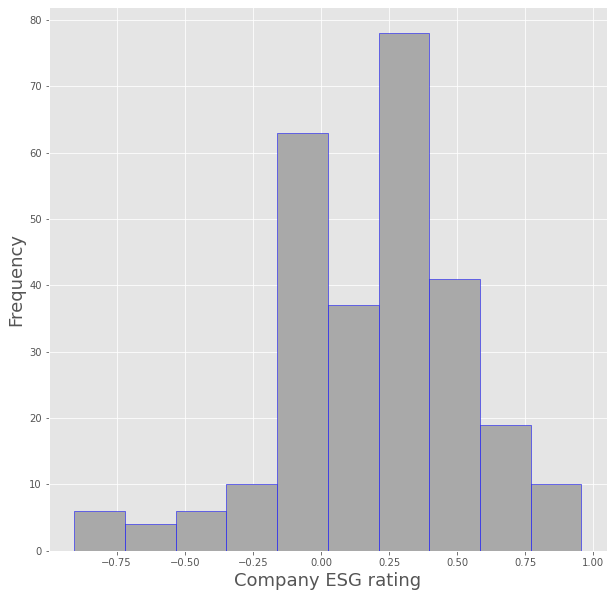

In [114]:
data = df1.company_pulse  # save the company_pulse data in variable called "data"
plt.hist(data, bins = 10, color='darkgray', edgecolor='blue')
plt.rcParams['figure.figsize'] = [10,10]
plt.ylabel('Frequency', fontsize=18)
plt.xlabel("Company ESG rating", fontsize=18)
plt.show()

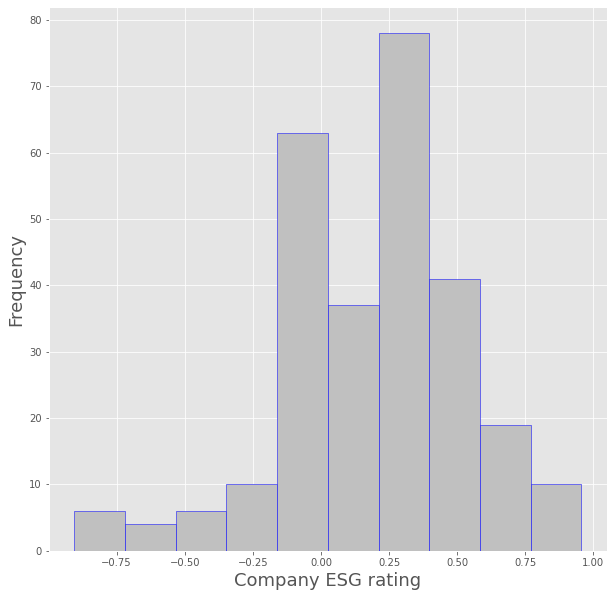

In [120]:
data = df1.company_pulse  # save the company_pulse data in variable called "data"
plt.hist(data, bins = 10, color='silver', edgecolor='blue')
plt.rcParams['figure.figsize'] = [10,10]
plt.ylabel('Frequency', fontsize=18)
plt.xlabel("Company ESG rating", fontsize=18)
plt.show()

### BROWNS

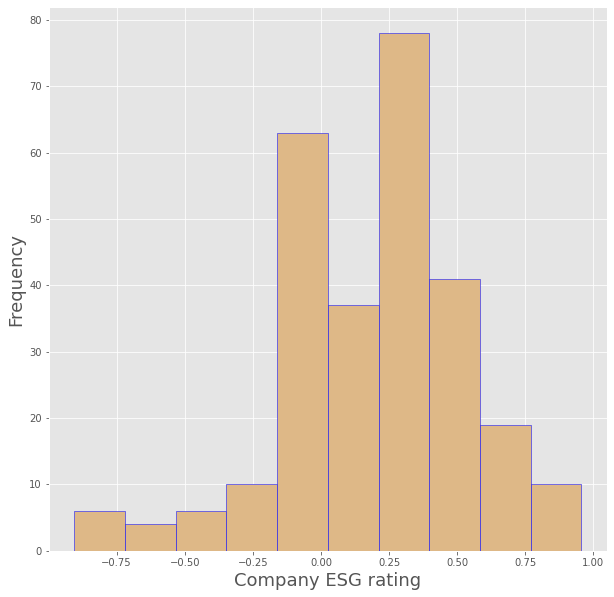

In [122]:
data = df1.company_pulse  # save the company_pulse data in variable called "data"
plt.hist(data, bins = 10, color='burlywood', edgecolor='blue')
plt.rcParams['figure.figsize'] = [10,10]
plt.ylabel('Frequency', fontsize=18)
plt.xlabel("Company ESG rating", fontsize=18)
plt.show()

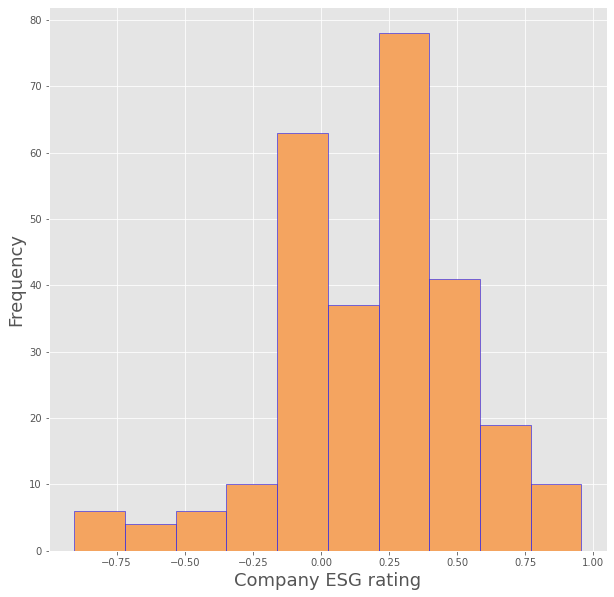

In [126]:
data = df1.company_pulse  # save the company_pulse data in variable called "data"
plt.hist(data, bins = 10, color='sandybrown', edgecolor='blue')
plt.rcParams['figure.figsize'] = [10,10]
plt.ylabel('Frequency', fontsize=18)
plt.xlabel("Company ESG rating", fontsize=18)
plt.show()

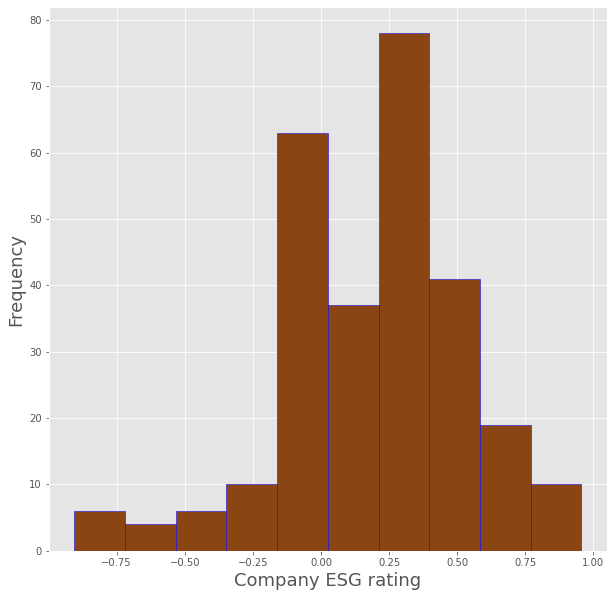

In [125]:
data = df1.company_pulse  # save the company_pulse data in variable called "data"
plt.hist(data, bins = 10, color='saddlebrown', edgecolor='blue')
plt.rcParams['figure.figsize'] = [10,10]
plt.ylabel('Frequency', fontsize=18)
plt.xlabel("Company ESG rating", fontsize=18)
plt.show()

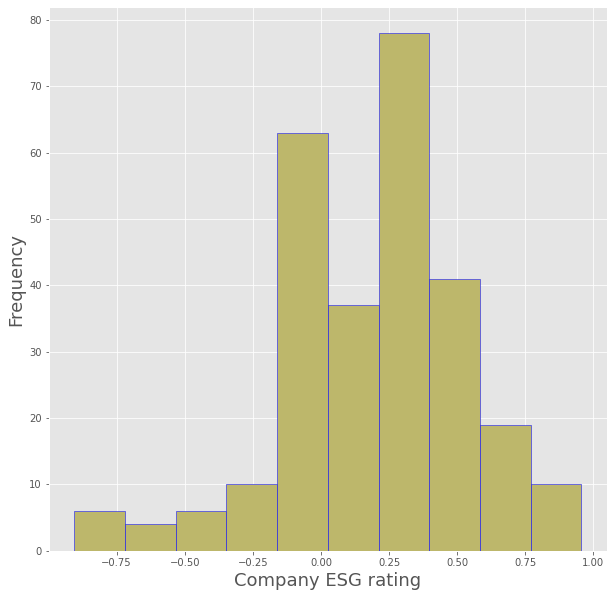

In [132]:
data = df1.company_pulse  # save the company_pulse data in variable called "data"
plt.hist(data, bins = 10, color='darkkhaki', edgecolor='blue')
plt.rcParams['figure.figsize'] = [10,10]
plt.ylabel('Frequency', fontsize=18)
plt.xlabel("Company ESG rating", fontsize=18)
plt.show()

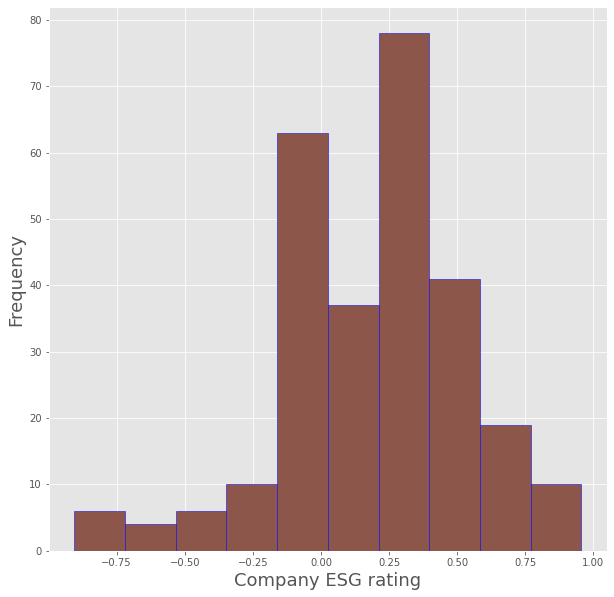

In [128]:
data = df1.company_pulse  # save the company_pulse data in variable called "data"
plt.hist(data, bins = 10, color='#8c564b', edgecolor='blue') # color is "chestnut brown"
plt.rcParams['figure.figsize'] = [10,10]
plt.ylabel('Frequency', fontsize=18)
plt.xlabel("Company ESG rating", fontsize=18)
plt.show()